# Detección de outliers

Un outlier es un valor que numéricamente es muy diferente al resto de los datos, lo que puede afectar al momento su análisis, por lo que es aconsejable retirarlos antes de seguir adelante con el mismo. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

importando datos

In [5]:
Rios=pd.read_csv ('C:/Users/pc/Archivos en Jupyter/archivos de practica/Rocio-Chavez-youtube-Files-master/Rios.csv', engine ='python', index_col=0)

In [6]:
Rios

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
137,720
138,270
139,430


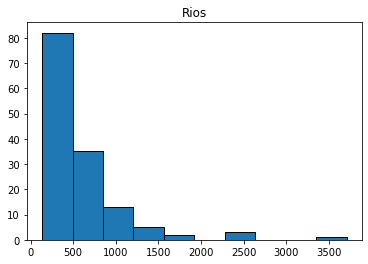

In [10]:
plt.title("Rios")
plt.hist(Rios["Millas"], edgecolor= "black")
plt.show()

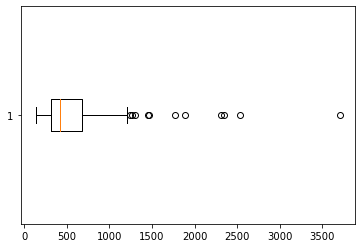

In [11]:
plt.boxplot(Rios["Millas"], vert=False)
plt.show()

In [12]:
Q1 = Rios["Millas"].quantile(0.25)
print ("primer cuartil", Q1) 
Q3 = Rios["Millas"].quantile(0.75)
print ("primer cuartil", Q3) 
IQR = Q3 - Q1
print ("Rango intercuartil", IQR) 

Mediana = Rios ["Millas"].median()
print ("Mediana", Mediana)

Valor_Minimo= Rios ["Millas"].min()
print ("Valor minimo", Valor_Minimo)
Valor_Maximo= Rios ["Millas"].max()
print ("Valor maximo", Valor_Maximo)

primer cuartil 310.0
primer cuartil 680.0
Rango intercuartil 370.0
Mediana 425.0
Valor minimo 135
Valor maximo 3710


In [14]:
BI_Calculado = (Q1 -1.5 * IQR)
print ("BI_Calculado \n", BI_Calculado)

BS_Calculado = (Q3 -1.5 * IQR)
print ("BS_Calculado \n", BS_Calculado)

BI_Calculado 
 -245.0
BS_Calculado 
 125.0


In [15]:
ubicacion_outliers = (Rios["Millas"] < BI_Calculado) | (Rios["Millas"] > BS_Calculado)
print ("\n Ubicacion de outliers \n", ubicacion_outliers)


 Ubicacion de outliers 
 Rio
1      True
2      True
3      True
4      True
5      True
       ... 
137    True
138    True
139    True
140    True
141    True
Name: Millas, Length: 141, dtype: bool


In [18]:
outliers = Rios[ubicacion_outliers]
print ("\n Lista de outliers \n", outliers)


 Lista de outliers 
      Millas
Rio        
1       735
2       320
3       325
4       392
5       524
..      ...
137     720
138     270
139     430
140     671
141    1770

[141 rows x 1 columns]


In [20]:
outliers_ordnados = outliers.sort_values("Millas")
outliers_ordnados

,Millas
Rio,
8,135
17,202
108,210
39,210
129,215
...,...
101,1885
69,2315
66,2348


In [36]:
ubicacion_sin_out = (Rios["Millas"] > BI_Calculado) | (Rios["Millas"] < BS_Calculado)
sin_outliers = Rios[ubicacion_sin_out]
sin_outliers

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
137,720
138,270
139,430


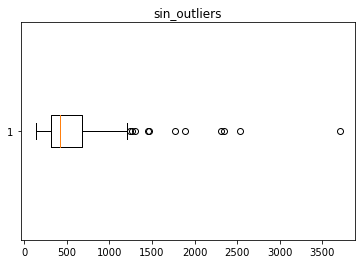

In [39]:
plt.title("sin_outliers")
plt.boxplot(sin_outliers["Millas"], vert=False)
plt.show()